In [25]:
import warnings
warnings.filterwarnings('ignore')

In [26]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [27]:
data = pd.read_csv('C:/Users/Aravind/Work/PROJECTS/Cloudburst-Prediction-System/data/processed/Data-final.csv')

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9840 entries, 0 to 9839
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   latitude                      9840 non-null   float64
 1   longitude                     9840 non-null   float64
 2   temperature_celsius           9840 non-null   float64
 3   condition_text                9840 non-null   float64
 4   wind_mph                      9840 non-null   float64
 5   wind_degree                   9840 non-null   int64  
 6   wind_direction                9840 non-null   float64
 7   pressure_mb                   9840 non-null   float64
 8   pressure_in                   9840 non-null   float64
 9   precip_mm                     9840 non-null   float64
 10  precip_in                     9840 non-null   float64
 11  humidity                      9840 non-null   int64  
 12  cloud                         9840 non-null   int64  
 13  fee

In [29]:
data = data[['latitude' , 'longitude' ,'temperature_celsius' , 'feels_like_celsius' , 'pressure_mb' , 'humidity' ,  'wind_mph' , 'wind_degree' , 'cloud']]

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9840 entries, 0 to 9839
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   latitude             9840 non-null   float64
 1   longitude            9840 non-null   float64
 2   temperature_celsius  9840 non-null   float64
 3   feels_like_celsius   9840 non-null   float64
 4   pressure_mb          9840 non-null   float64
 5   humidity             9840 non-null   int64  
 6   wind_mph             9840 non-null   float64
 7   wind_degree          9840 non-null   int64  
 8   cloud                9840 non-null   int64  
dtypes: float64(6), int64(3)
memory usage: 692.0 KB


In [31]:
conversion_factor = 273.15
data['temperature_celsius'] = data['temperature_celsius'].add(conversion_factor)
data['feels_like_celsius'] = data['feels_like_celsius'].add(conversion_factor)

In [32]:
new_column_name = 'temperature_kelvin'
data = data.rename(columns={'temperature_celsius': new_column_name})

In [33]:
new_column_name = 'feels_like_kelvin'
data = data.rename(columns={'feels_like_celsius': new_column_name})

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9840 entries, 0 to 9839
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   latitude            9840 non-null   float64
 1   longitude           9840 non-null   float64
 2   temperature_kelvin  9840 non-null   float64
 3   feels_like_kelvin   9840 non-null   float64
 4   pressure_mb         9840 non-null   float64
 5   humidity            9840 non-null   int64  
 6   wind_mph            9840 non-null   float64
 7   wind_degree         9840 non-null   int64  
 8   cloud               9840 non-null   int64  
dtypes: float64(6), int64(3)
memory usage: 692.0 KB


In [35]:
data.head()

,latitude,longitude,temperature_kelvin,feels_like_kelvin,pressure_mb,humidity,wind_mph,wind_degree,cloud
0,24.57,77.72,300.65,302.85,1008.0,67,12.8,281,26
1,23.33,77.80,300.65,303.15,1008.0,70,9.6,287,19
2,22.07,78.93,299.45,301.35,1009.0,70,11.4,317,51
3,21.86,77.93,298.75,300.75,1009.0,76,10.5,297,65
4,22.75,77.72,300.35,303.05,1009.0,74,10.1,274,82


In [36]:
X = data.drop(['cloud'],axis=1)
y = data['cloud']

In [37]:
from sklearn.model_selection import train_test_split

X_train , X_valid , y_train , y_valid = train_test_split(X , y , test_size=0.1 , random_state=42)

In [65]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [69]:
reg = RandomForestRegressor(n_estimators = 200 , max_depth=8)
reg.fit(X_train , y_train)
y_pred = reg.predict(X_valid)

rmse = np.sqrt(mean_squared_error(y_valid , y_pred))
print(f"Root mean squared error of the model : {rmse} ")
r2 = r2_score(y_valid , y_pred)
print(f"R2 score of the model : {r2} ")

Root mean squared error of the model : 20.212925176038752 
R2 score of the model : 0.5927687342304475 


In [40]:
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation="relu" , kernel_initializer="he_normal"),
    tf.keras.layers.Dense(50, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(50, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(50, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(50, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(50, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(50, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(1)
])

In [41]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
277/277 [==============================] - 2s 2ms/step - loss: 814.5298 - root_mean_squared_error: 28.5400 - val_loss: 528.9999 - val_root_mean_squared_error: 23.0000
Epoch 2/20
277/277 [==============================] - 0s 2ms/step - loss: 477.6798 - root_mean_squared_error: 21.8559 - val_loss: 510.8039 - val_root_mean_squared_error: 22.6010
Epoch 3/20
277/277 [==============================] - 0s 2ms/step - loss: 451.4921 - root_mean_squared_error: 21.2483 - val_loss: 478.2729 - val_root_mean_squared_error: 21.8695
Epoch 4/20
277/277 [==============================] - 0s 2ms/step - loss: 434.2166 - root_mean_squared_error: 20.8379 - val_loss: 462.2092 - val_root_mean_squared_error: 21.4991
Epoch 5/20
277/277 [==============================] - 0s 1ms/step - loss: 421.5196 - root_mean_squared_error: 20.5309 - val_loss: 455.5701 - val_root_mean_squared_error: 21.3441
Epoch 6/20
277/277 [==============================] - 0s 2ms/step - loss: 411.8516 - root_mean_squared_error: 

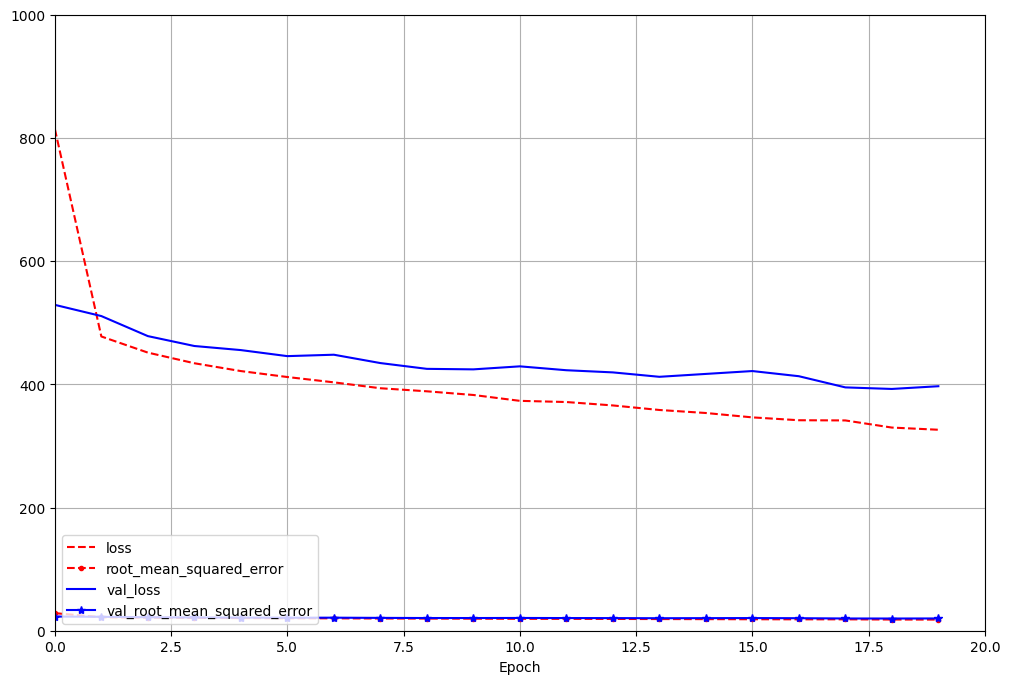

In [42]:
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(
    figsize=(12, 8), xlim=[0, 20], ylim=[0, 1000], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")
plt.show()

In [71]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(512, activation='relu',
                          kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(256, activation='relu',
                          kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation='relu',
                          kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64, activation='relu',
                          kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1)
])

In [72]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

In [73]:
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
277/277 [==============================] - 4s 4ms/step - loss: 2575.3489 - root_mean_squared_error: 50.7479 - val_loss: 945.8186 - val_root_mean_squared_error: 30.7542
Epoch 2/20
277/277 [==============================] - 1s 4ms/step - loss: 1420.3999 - root_mean_squared_error: 37.6882 - val_loss: 834.2371 - val_root_mean_squared_error: 28.8832
Epoch 3/20
277/277 [==============================] - 1s 4ms/step - loss: 591.3649 - root_mean_squared_error: 24.3180 - val_loss: 464.5982 - val_root_mean_squared_error: 21.5545
Epoch 4/20
277/277 [==============================] - 1s 4ms/step - loss: 460.5035 - root_mean_squared_error: 21.4593 - val_loss: 448.7680 - val_root_mean_squared_error: 21.1841
Epoch 5/20
277/277 [==============================] - 1s 4ms/step - loss: 449.8061 - root_mean_squared_error: 21.2086 - val_loss: 465.7069 - val_root_mean_squared_error: 21.5802
Epoch 6/20
277/277 [==============================] - 1s 4ms/step - loss: 434.3777 - root_mean_squared_error

In [75]:
r2 = r2_score(y_valid , y_pred)
print(f"R2 score of the model : {r2} ")

R2 score of the model : 0.5964682996778728 


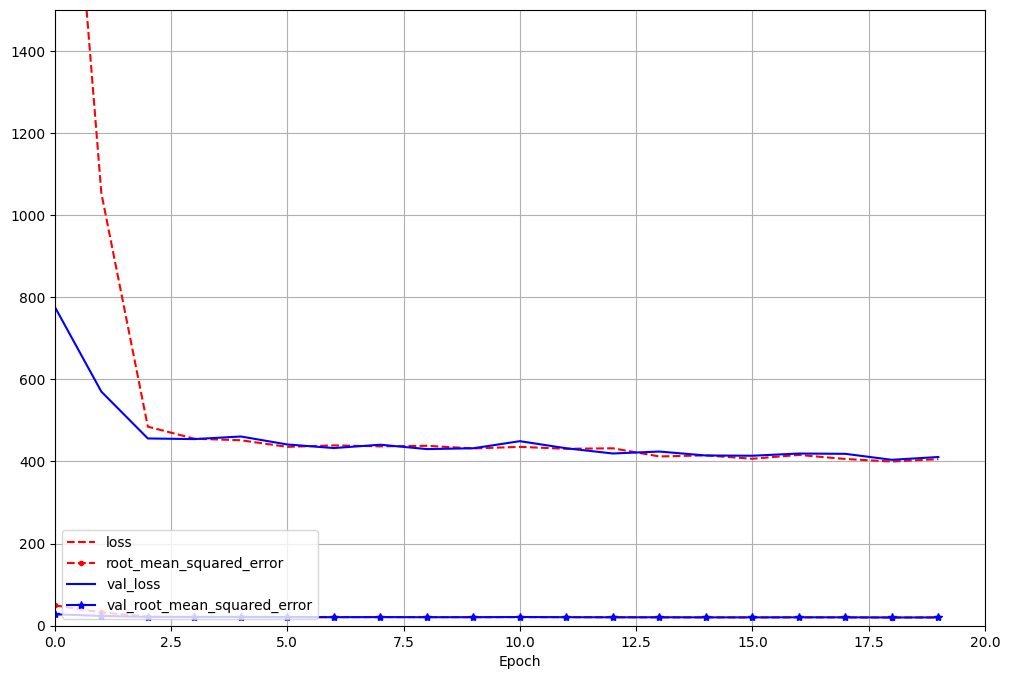

In [47]:
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(
    figsize=(12, 8), xlim=[0, 20], ylim=[0, 1500], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")
plt.show()

In [48]:
model.save("C:/Users/Aravind/Work/PROJECTS/Cloudburst-Prediction-System/models/api_model" , save_format="tf")

INFO:tensorflow:Assets written to: C:/Users/Aravind/Work/PROJECTS/Cloudburst-Prediction-System/models/api_model\assets


INFO:tensorflow:Assets written to: C:/Users/Aravind/Work/PROJECTS/Cloudburst-Prediction-System/models/api_model\assets
